In [1]:
"""
jupyter-nbconvert tabulate.ipynb --to python 
ipython tabulate.py -- --base_dir ~/plume/plumezoo/latest/fly/memory/

ipython tabulate.py -- --base_dir ~/plume/plumezoo/
ipython tabulate.py -- --base_dir ~/plume/plume2/ppo/trained_models/
"""

'\njupyter-nbconvert tabulate.ipynb --to python \nipython tabulate.py -- --base_dir ~/plume/plumezoo/latest/fly/memory/\n\nipython tabulate.py -- --base_dir ~/plume/plumezoo/\nipython tabulate.py -- --base_dir ~/plume/plume2/ppo/trained_models/\n'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import glob 
from pathlib import Path
import tqdm
import os
import argparse

In [3]:
import sys
batchmode = False
if 'ipykernel_launcher' in sys.argv[0]:
    print("Interactive mode")
    
    BASE_DIR="~/plume/plumezoo/latest/fly/memory_all/"

    
else:
    batchmode = True
    print("Batch/CLI mode")
    import argparse
    
    parser = argparse.ArgumentParser(description='')
    parser.add_argument('--base_dir', default='./')
    args = parser.parse_args()
    BASE_DIR=args.base_dir

Interactive mode


In [4]:
print(BASE_DIR)
# fnames = Path(BASE_DIR).rglob('*VRNN*/*_summary.csv')
# fnames = !find {BASE_DIR} -name "*VRNN*/*_summary.csv"
fnames = !find {BASE_DIR} -name "*_summary.csv"
# fnames

~/plume/plumezoo/latest/fly/memory_all/


In [5]:
counts_df = []
for fname in tqdm.tqdm(fnames):
    s = pd.read_csv(fname) 
    dataset = str(fname).split('/')[-1].replace('_summary.csv','')
    row = {
        'dataset': dataset,
        'HOME': sum(s['reason'] == 'HOME'),
        'OOB': sum(s['reason'] == 'OOB'),
        'OOT': sum(s['reason'] == 'OOT'),
        'total': len(s['reason']),
        'seed': str(fname).split('seed')[-1].split('/')[0],
        'model_dir': str(fname).replace(f'{dataset}_summary.csv','').replace(os.path.expanduser(BASE_DIR), ''),
        'code': str(fname).split('code')[-1].split('_')[0],
        'fname': str(fname)
    }
    counts_df.append(row)
    
counts_df = pd.DataFrame(counts_df)

100%|██████████| 784/784 [00:01<00:00, 668.31it/s]


In [6]:
eligible_datasets = [
        'constantx5b5', 
#         'switch15x5b5', 
#         'switch30x5b5', 
        'switch45x5b5', 
        'noisy3x5b5', 
#         'noisy6x5b5',
        'constantx5b5_0.8',
        'constantx5b5_0.6',
        'constantx5b5_0.4', 
        'constantx5b5_0.2',
]

In [7]:
print(counts_df.shape)
# counts_df = counts_df.query("total == 240 and dataset in @eligible_datasets")
counts_df = counts_df.query("dataset in @eligible_datasets")
print(counts_df.shape)

(784, 9)
(784, 9)


In [8]:
counts_df['dataset'].unique()

array(['switch45x5b5', 'constantx5b5_0.8', 'constantx5b5_0.4',
       'constantx5b5_0.6', 'noisy3x5b5', 'constantx5b5',
       'constantx5b5_0.2'], dtype=object)

In [9]:
# Pivot and total
pivot_df = counts_df.pivot(index=['model_dir', 'code'], columns='dataset', values='HOME').reset_index()
# pivot_df['total'] = pivot_df.sum(axis=1, skipna=True)
pivot_df['total'] = pivot_df[['constantx5b5', 'noisy3x5b5', 'switch45x5b5',]].sum(axis=1, skipna=True)
# pivot_df['total'] = pivot_df['constantx5b5']/3 + pivot_df['noisy3x5b5'] + pivot_df['switch45x5b5']

In [10]:
col_order = [
        'total',
        'constantx5b5', 
        'switch45x5b5', 
        'noisy3x5b5', 
#         'noisy6x5b5',
#         'switch30x5b5', 
#         'switch15x5b5', 
        'constantx5b5_0.8',
        'constantx5b5_0.6',
        'constantx5b5_0.4', 
        'constantx5b5_0.2',
        'code',
        'model_dir',
]
pivot_df = pivot_df[col_order]
pivot_df = pivot_df.sort_values(by='total', ascending=False)
pivot_df

dataset  total  constantx5b5  switch45x5b5  noisy3x5b5  constantx5b5_0.8  \
1          339           176           160           3                14   
9          337           121           138          78               116   
13         330           135           109          86               123   
55         327           136           146          45               129   
14         281           135           135          11               123   
..         ...           ...           ...         ...               ...   
81           0             0             0           0                 0   
22           0             0             0           0                 0   
57           0             0             0           0                 0   
58           0             0             0           0                 0   
59           0             0             0           0                 0   

dataset  constantx5b5_0.6  constantx5b5_0.4  constantx5b5_0.2    code  \
1                       5                23                 6    VRNN   
9                      94                80                 5    VRNN   
13                    123                94                14    VRNN   
55                    136               130               123     GRU   
14                    145                 8                 2     GRU   
..                    ...               ...               ...     ...   
81                      0                 0                 0  MLPs12   
22                      0                 0                 0  MLPs02   
57                      0                 0                 0  MLPs02   
58                      0                 0                 0  MLPs02   
59                      0                 0                 0  MLPs02   

dataset                                          model_dir  
1        plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...  
9        plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...  
13       plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...  
55       plume_20210603_GRU_constantx5b5noisy3x5b5_step...  
14       plume_20210602_GRU_constantx5b5noisy3x5b5_step...  
..                                                     ...  
81       plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....  
22       plume_20210602_MLP_s02_noisy3x5b5_stepoob_bx1....  
57       plume_20210603_MLP_s02_noisy3x5b5_stepoob_bx1....  
58       plume_20210603_MLP_s02_noisy3x5b5_stepoob_bx1....  
59       plume_20210603_MLP_s02_noisy3x5b5_stepoob_bx1....  

[112 rows x 10 columns]

In [11]:
pivot_df.to_csv(f'{BASE_DIR}/tabulated.tsv', sep='\t', index=False)
pivot_df.to_csv(f'{BASE_DIR}/tabulated.csv', index=False)

In [12]:
# import seaborn as sns
# sns.pairplot(pivot_df)

In [13]:
# Before filtering
pivot_df.groupby('code')['total'].count()

code
GRU       14
MLPs02    14
MLPs04    14
MLPs06    14
MLPs08    14
MLPs10    14
MLPs12    14
VRNN      14
Name: total, dtype: int64

In [14]:
# Filter for quality
# pivot_df.query("constantx5b5>0 and switch45x5b5>0 and noisy3x5b5>0 ").groupby('code').head(5)
# nonzeros = pivot_df.query("constantx5b5>10 and switch45x5b5>10 and noisy3x5b5>10 ")
# nonzeros = pivot_df.query("constantx5b5>0 and switch45x5b5>0 ") # for MLP_s02 and MLP_s04
# nonzeros = pivot_df.query("constantx5b5>0") # for MLP_s02 and MLP_s04

selected = [
    pivot_df.query("constantx5b5>10 and switch45x5b5>10 and noisy3x5b5>10 and code in ['VRNN', 'GRU'] "),
    pivot_df.query("constantx5b5>0 and switch45x5b5>0 and noisy3x5b5>=0 and code not in ['VRNN', 'GRU'] "),    
]

selected = pd.concat(selected).sort_values(by='total', ascending=False).groupby('code').head(5)
selected.groupby('code')['total'].count()



code
GRU       5
MLPs02    5
MLPs04    5
MLPs06    5
MLPs08    5
MLPs10    5
MLPs12    5
VRNN      5
Name: total, dtype: int64

In [15]:
# Sort to select top
# selected = nonzeros.sort_values(by='total', ascending=False).groupby('code').head(5) # .reset_index(drop=True)
# selected.groupby('code')['total'].count()

In [16]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
selected['model_dir'].to_csv(f'{BASE_DIR}/selected.csv', index=False, header=False)
selected['model_dir']

9      plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...
13     plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...
55     plume_20210603_GRU_constantx5b5noisy3x5b5_step...
14     plume_20210602_GRU_constantx5b5noisy3x5b5_step...
20     plume_20210602_GRU_constantx5b5noisy3x5b5_step...
6      plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...
12     plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...
51     plume_20210603_GRU_constantx5b5noisy3x5b5_step...
7      plume_20210601_VRNN_constantx5b5noisy3x5b5_ste...
17     plume_20210602_GRU_constantx5b5noisy3x5b5_step...
83     plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....
38     plume_20210602_MLP_s08_noisy3x5b5_stepoob_bx1....
25     plume_20210602_MLP_s02_noisy3x5b5_stepoob_bx1....
80     plume_20210603_MLP_s12_noisy3x5b5_stepoob_bx1....
86     plume_20210604_MLP_s02_noisy3x5b5_stepoob_bx1....
74     plume_20210603_MLP_s10_noisy3x5b5_stepoob_bx1....
104    plume_20210604_MLP_s10_noisy3x5b5_stepoob_bx1....
61     plume_20210603_MLP_s04_n

In [17]:
"""
mkdir ../memory/

DESTDIR=../memory/
for ARCH in _s02 _s04 _s06 _s08 _s10 _s12 VRNN GRU; do
	for DIR in $(cat selected.csv | grep $ARCH); do 
	 echo ${DIR%/} $(ls ${DIR%/}* | wc -l)
	 mv ${DIR%/}* $DESTDIR
	done
done
"""

[ x.split('seed')[-1] for x in selected.query("code == 'VRNN'")['model_dir'] ]

['3307e9/', '9781ba/', '2760377/', '776762/', '3199993/']

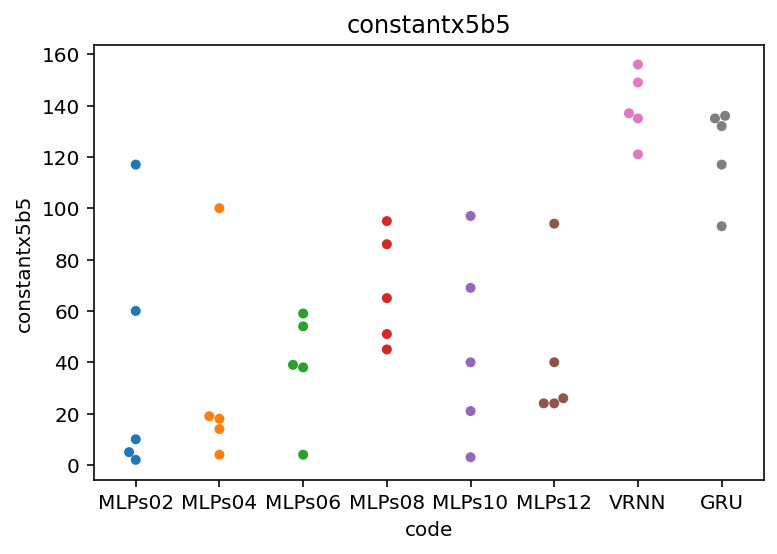

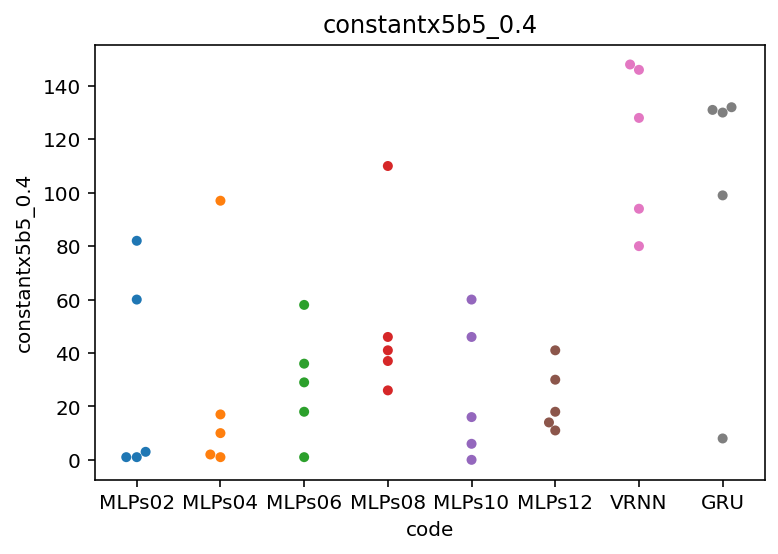

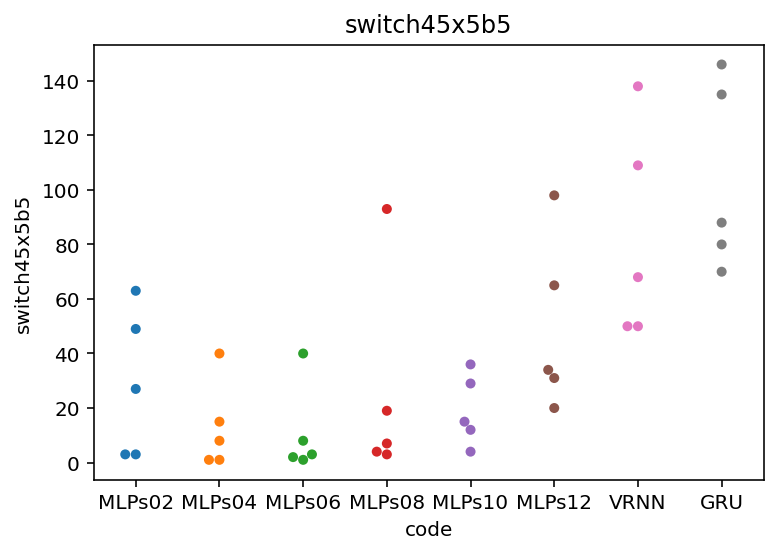

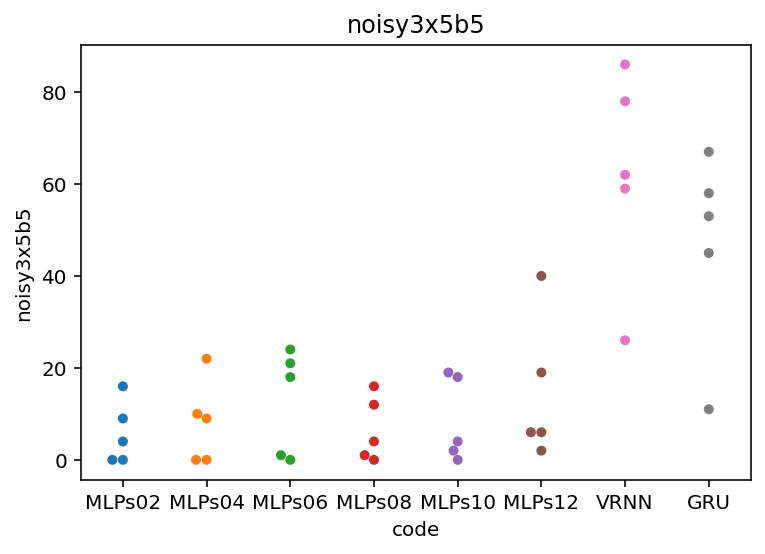

In [18]:
# success_counts_df = pivot_df[['constantx5b5', 'noisy3x5b5', 'switch45x5b5','code', 'model_dir']].pivot(index) # .groupby(['code', 'model_dir']).sum().melt()
# # success_counts_df['label'] = success_counts_df['dataset'].map({})
# g = sns.FacetGrid(success_counts_df, col='dataset', size=2.75, aspect=1.0, hue='dataset')
# # g.map( sns.stripplot, 'model_code', 'n_success_episodes', dodge=True)
# g.map( sns.swarmplot, 'model_code', 'n_success_episodes', dodge=True)
# g.fig.subplots_adjust(wspace=0.1)
# # g.set(ylim=(0,240))
# g.set(ylim=(0,200))
# # g.tight_layout() # incompatible with subplots_adjust
# g.axes.flat[0].set_ylabel("Successful episodes [#]")
# success_counts_df/
# sns.swarmplot
for col in ['constantx5b5', 'constantx5b5_0.4', 'switch45x5b5', 'noisy3x5b5',]:
    sns.swarmplot(x='code', y=col, data=selected,
         order=['MLPs02', 'MLPs04', 'MLPs06', 'MLPs08', 'MLPs10', 'MLPs12', 'VRNN', 'GRU'])
    plt.title(col)
    plt.show()
